In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 1. SAME PARAMETERS 

In [41]:
## SAME PARAMETER ##
beta = 0.33 # Tansmission rate
gamma = 0.14 # Recovery rate
nu = 0.01  # vaccine rate

N = 5_826_529  #Total Population
I0 = 500              # Start Infection
R0_init = 0 #Start recovering from disease
V0 = 0 #Start vaccinated
S0 = N - I0 - R0_init - V0 #Start susceptible


T = 365 #Daily Time Steps
dt = 1 # Simulation updates daily


In [42]:

# Arrays to store results
S = np.zeros(T+1, dtype=int)
I = np.zeros(T+1, dtype=int)
R = np.zeros(T+1, dtype=int)
V = np.zeros(T+1, dtype=int)

# Initial conditions
S[0] = S0
I[0] = I0
R[0] = R0_init
V[0] = V0

In [43]:
# Stochastic simulation
for t in range(T):
    # Probabilities for each transition
    p_infect = 1 - np.exp(-beta * I[t] / N * dt)
    p_recover = 1 - np.exp(-gamma * dt)
    p_vacc = 1 - np.exp(-nu * dt)

    # Events sampled from binomial distributions
    new_infect = np.random.binomial(S[t], p_infect)
    new_recover = np.random.binomial(I[t], p_recover)
    new_vacc = np.random.binomial(S[t] - new_infect, p_vacc)  # only from remaining susceptibles

    # Update states
    S[t+1] = S[t] - new_infect - new_vacc
    I[t+1] = I[t] + new_infect - new_recover
    R[t+1] = R[t] + new_recover
    V[t+1] = V[t] + new_vacc

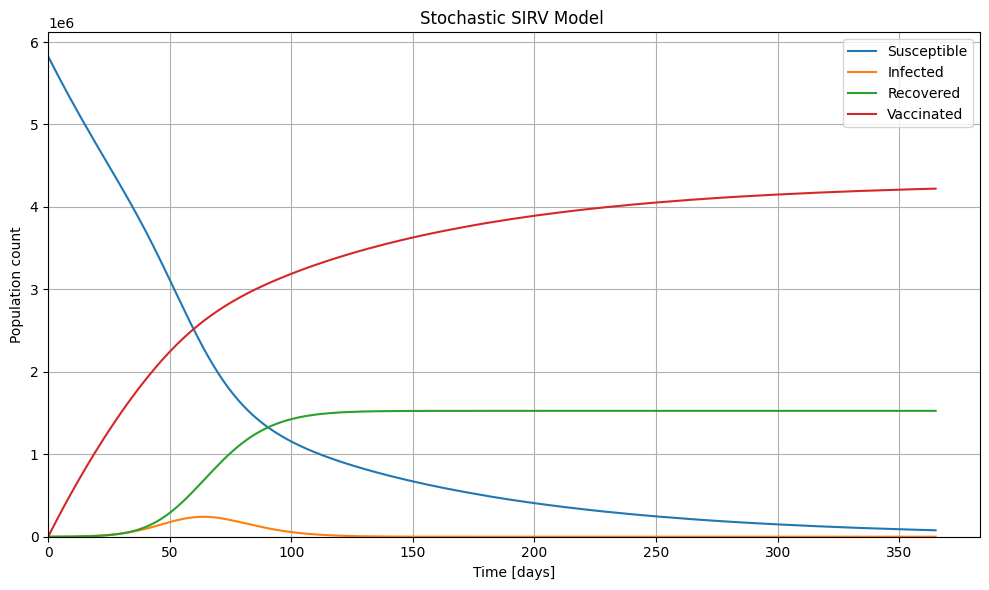

In [44]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(S, label='Susceptible')
plt.plot(I, label='Infected')
plt.plot(R, label='Recovered')
plt.plot(V, label='Vaccinated')
plt.xlabel('Time [days]')
plt.ylabel('Population count')
plt.title('Stochastic SIRV Model ')
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. PLAYING AROUND WITH PARAMETERS

In [ ]:
# Parameters
beta = 0.6 
gamma = 0.03 #  recovery rate
nu = 0.03 # vaccine rollout
N = 1_000_000
I0 = 2000
R0_init = 0
V0 = 0
S0 = N - I0 - R0_init - V0
T = 365
eta_values = [1.0, 0.8, 0.5, 0.2, 0.0]

In [ ]:
infected_curves = []

for eta in eta_values:
    S = np.zeros(T+1, dtype=int)
    I = np.zeros(T+1, dtype=int)
    R = np.zeros(T+1, dtype=int)
    V = np.zeros(T+1, dtype=int)

    S[0], I[0], R[0], V[0] = S0, I0, R0_init, V0

    for t in range(T):
        p_infect = 1 - np.exp(-beta * I[t] / N)
        p_recover = 1 - np.exp(-gamma)
        p_vacc = 1 - np.exp(-nu)

        new_infect = np.random.binomial(S[t], p_infect)
        new_recover = np.random.binomial(I[t], p_recover)
        new_vacc = np.random.binomial(S[t] - new_infect, p_vacc)
        V_eff = np.random.binomial(new_vacc, eta)
        V_fail = new_vacc - V_eff

        S[t+1] = S[t] - new_infect - V_eff  # V_fail remains susceptible
        I[t+1] = I[t] + new_infect - new_recover
        R[t+1] = R[t] + new_recover
        V[t+1] = V[t] + V_eff

    infected_curves.append(I)

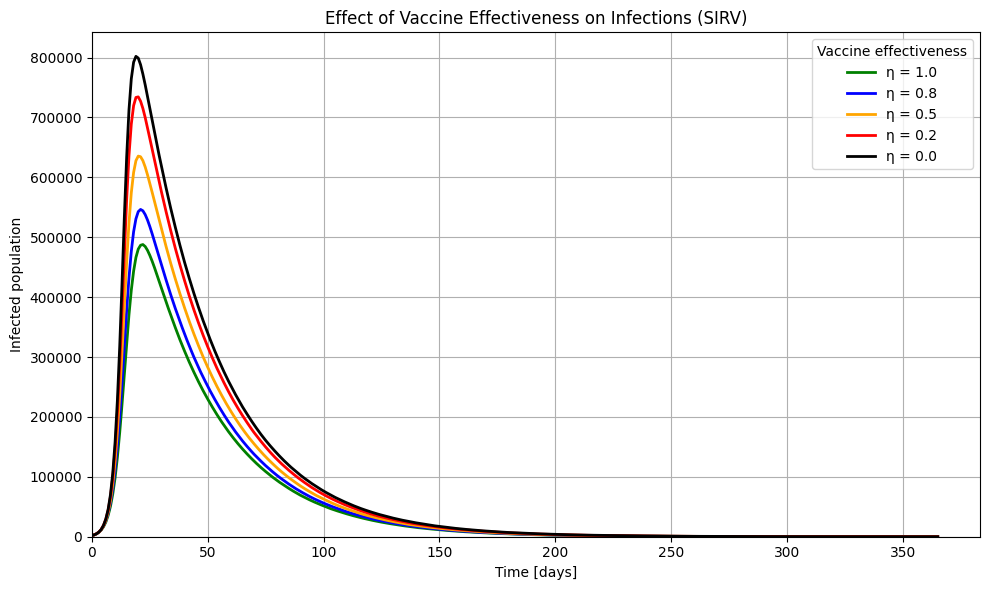

In [39]:

# Plot
plt.figure(figsize=(10, 6))
colors = ['green', 'blue', 'orange', 'red', 'black']
for i, eta in enumerate(eta_values):
    plt.plot(infected_curves[i], label=f'η = {eta}', linewidth=2, color=colors[i])
plt.xlabel('Time [days]')
plt.ylabel('Infected population')
plt.title('Effect of Vaccine Effectiveness on Infections (SIRV)')
plt.legend(title='Vaccine effectiveness')
plt.grid(True)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## PLAYING AROUND

In [ ]:
#Parameters
N = 5_000_000        # population
I0 = 2000             # initial infections
beta = 0.30           #  infection rate
gamma = 0.005        # Infection duration
nu = 0.05             # vaccination rate
eta = 0.95           # effectiveness
hesitancy = 0.05     # hesitancy
delay_start = 60     # Vaccine delay
trigger_threshold = 2000  # Trigger Vaccine
T = 730              # DAYS

R0_init = 0
V0 = 0
S0 = N - I0 - R0_init - V0
S = np.zeros(T+1, dtype=int)
I = np.zeros(T+1, dtype=int)
R = np.zeros(T+1, dtype=int)
V = np.zeros(T+1, dtype=int)
V_applied = np.zeros(T+1, dtype=int)

S[0], I[0], R[0], V[0] = S0, I0, R0_init, V0

# Simulation
for t in range(T):
    p_infect = 1 - np.exp(-beta * I[t] / N)
    p_recover = 1 - np.exp(-gamma)
    p_vacc = 0

    if t >= delay_start and I[t] > trigger_threshold:
        p_vacc = 1 - np.exp(-nu)

    new_infect = np.random.binomial(S[t], p_infect)
    new_recover = np.random.binomial(I[t], p_recover)

    eligible_for_vaccine = max(0, int((1 - hesitancy) * (S[t] - new_infect)))
    new_vacc = np.random.binomial(eligible_for_vaccine, p_vacc)

    V_eff = np.random.binomial(new_vacc, eta)

    S[t+1] = S[t] - new_infect - V_eff
    I[t+1] = I[t] + new_infect - new_recover
    R[t+1] = R[t] + new_recover
    V[t+1] = V[t] + V_eff
    V_applied[t+1] = V_eff

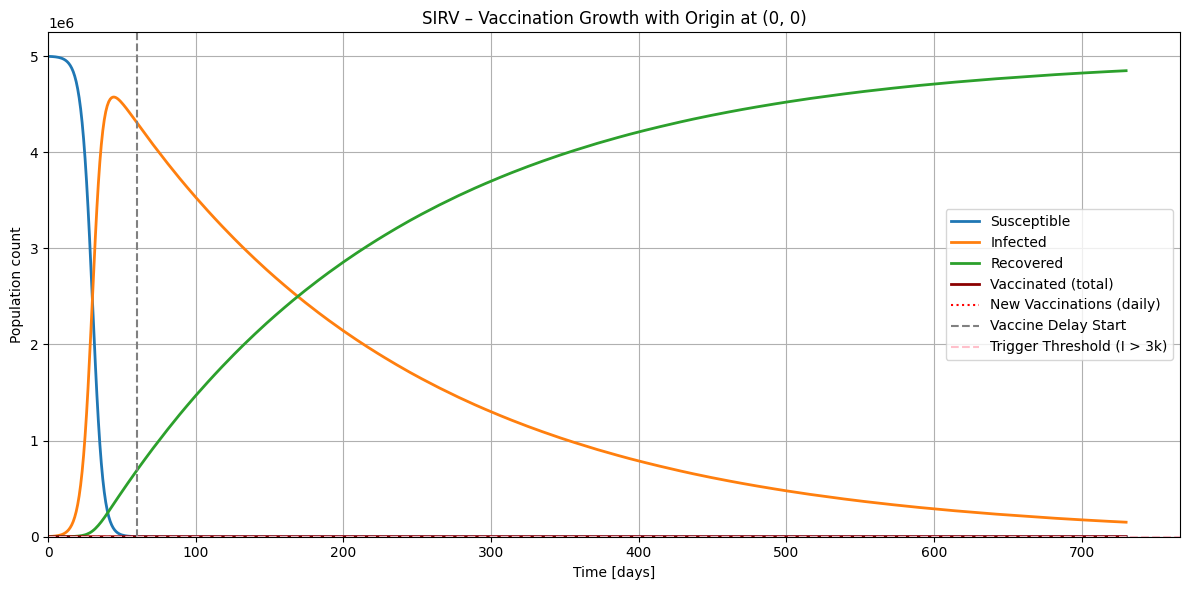

In [ ]:
# Visual clarity test
plt.figure(figsize=(12, 6))
plt.plot(S, label='Susceptible', linewidth=2)
plt.plot(I, label='Infected', linewidth=2)
plt.plot(R, label='Recovered', linewidth=2)
plt.plot(V, label='Vaccinated (total)', linewidth=2, color='darkred')
plt.plot(V_applied, label='New Vaccinations (daily)', linestyle=':', color='red')
plt.axvline(x=delay_start, color='gray', linestyle='--', label='Vaccine Delay Start')
plt.axhline(y=trigger_threshold, color='pink', linestyle='--', label='Trigger Threshold (I > 3k)')
plt.xlabel('Time [days]')
plt.ylabel('Population count')
plt.title('SIRV – Vaccination Growth with Origin at (0, 0)')
plt.legend()
plt.grid(True)
plt.xlim(left=0)
plt.ylim(bottom=0)  # y = 0
plt.tight_layout()
plt.show()

In [69]:
# GOING FOR SLOW INFECTION, FAST ROLL OUT, deciding vaccine delay
def simulate_and_plot_vaccine_effect(delay_start, label_suffix):
    N = 200_000
    I0 = 100
    beta = 0.2             # infection rate
    gamma = 0.01           # Fast recovery
    nu = 0.15              # vaccination rate
    eta = 0.98             # effective vaccine
    hesitancy = 0.01       # hesitancy
    trigger_threshold = 50 # threshold to trigger rollout
    T = 365

    R0_init = 0
    V0 = 0
    S0 = N - I0 - R0_init - V0

    S = np.zeros(T+1, dtype=int)
    I = np.zeros(T+1, dtype=int)
    R = np.zeros(T+1, dtype=int)
    V = np.zeros(T+1, dtype=int)

    S[0], I[0], R[0], V[0] = S0, I0, R0_init, V0

    for t in range(T):
        p_infect = 1 - np.exp(-beta * I[t] / N)
        p_recover = 1 - np.exp(-gamma)
        p_vacc = 0

        if t >= delay_start and I[t] > trigger_threshold:
            p_vacc = 1 - np.exp(-nu)

        new_infect = np.random.binomial(S[t], p_infect)
        new_recover = np.random.binomial(I[t], p_recover)

        eligible_for_vaccine = max(0, int((1 - hesitancy) * (S[t] - new_infect)))
        new_vacc = np.random.binomial(eligible_for_vaccine, p_vacc)
        V_eff = np.random.binomial(new_vacc, eta)

        S[t+1] = S[t] - new_infect - V_eff
        I[t+1] = I[t] + new_infect - new_recover
        R[t+1] = R[t] + new_recover
        V[t+1] = V[t] + V_eff

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(S, label='Susceptible', linewidth=2)
    plt.plot(I, label='Infected', linewidth=2, color='orange')
    plt.plot(R, label='Recovered', linewidth=2, color='green')
    plt.plot(V, label='Vaccinated', linewidth=2, color='darkred')
    plt.axvspan(delay_start, T, color='red', alpha=0.05, label='Vaccination Period')
    plt.axvline(x=delay_start, color='gray', linestyle='--', label='Vaccine Delay Start')
    plt.scatter(delay_start, V[delay_start], color='black', zorder=5)
    plt.xlabel('Time [days]')
    plt.ylabel('Population count')
    plt.title(f'SIRV – Visible Vaccine Impact: Delay {delay_start} Days ({label_suffix})')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()



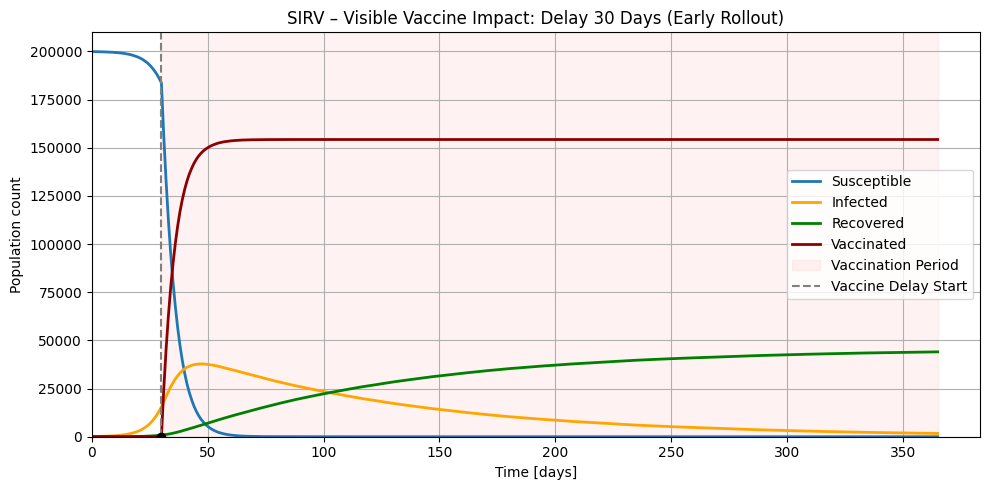

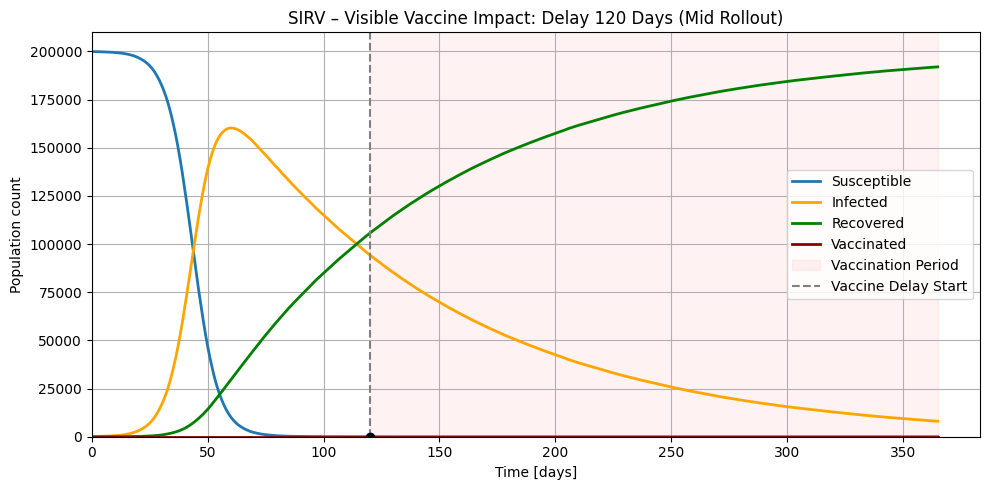

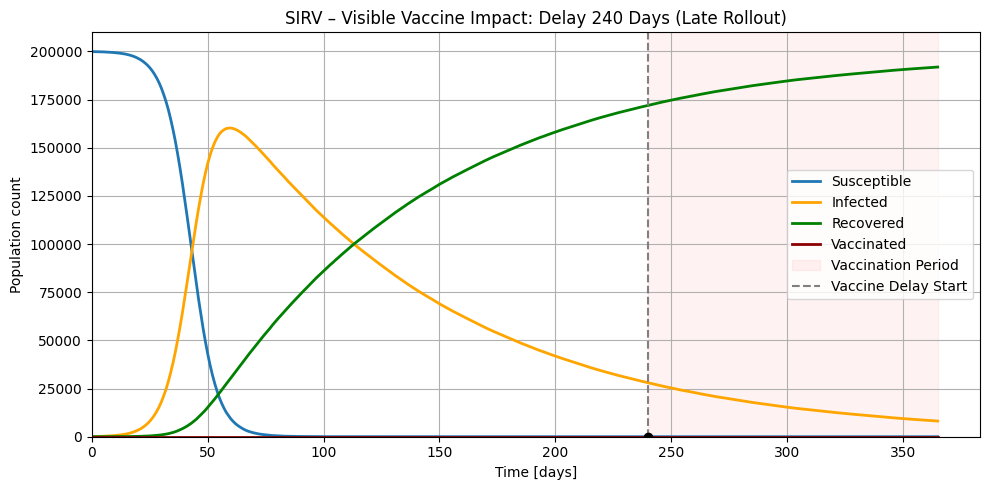

In [70]:
simulate_and_plot_vaccine_effect(delay_start=30, label_suffix="Early Rollout")
simulate_and_plot_vaccine_effect(delay_start=120, label_suffix="Mid Rollout")
simulate_and_plot_vaccine_effect(delay_start=240, label_suffix="Late Rollout")